# SWMAL Exercise Performance metrics
In this exercise we will take a look at various ways to evaluate your algorithm using performance metrics. We will do this be recreating some of the well known metric formulas in python functions, and comparing them to the version found in the Sklearn.metrics library. These functions will then be tested on the algorithms from the dummy classifier exercise.

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

The following codebit is copied from the dummy classifier exercise, and will therefore not be described further.


In [15]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np



# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y
# Fetches X and y
X,y = MNIST_GetDataSet()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)
#Convert to [0;1] via scaling
X = X / 255.
y_pred_sdg = sgd_clf.predict(X_test)


#Check if data is loaded

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
y_pred_dummy = dummy_clf.predict(X_test)



c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Qa Implement the Accuracy function and test it on the MNIST data.

an accuracy function will be created called MyAccuracy. It will return how many elements where predicted correctly. Furthermore a test function will be created. This function will use both the selfmade function and the sklearn version for validation. The testfunction will then be used on a simple example, the sdg and the dummy.

In [9]:
# TODO: Qa...
from sklearn.metrics import accuracy_score


def MyAccuracy(y_true, y_pred):
    if len(y_true)==0 or len(y_pred)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(y_true)


    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

print("\nTestAccuracy() simple example:")
TestAccuracy([1,2,3,4], [1,2,3,3])

print("\nTestAccuracy() on sdg:")
TestAccuracy(y_test_5, y_pred_sdg)
print("\nTestAccuracy() on dummy:")
TestAccuracy(y_test_5, y_pred_dummy)

#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..


TestAccuracy() simple example:

my a          =0.75
scikit-learn a=0.75

TestAccuracy() on sdg:

my a          =0.9492
scikit-learn a=0.9492

TestAccuracy() on dummy:

my a          =0.9108
scikit-learn a=0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In the following section a function and test function is created in the same way as with the previous function from Qa. This is done for the precision-, recall- and F1-score respectively.  

In [10]:
# TODO: Qb..
import sklearn.metrics as metrics
def MyPrecision(y_true, y_pred):
    #predicted condition positive. All the predicted trues
    pcp = [item for item in y_pred if item == True]
    if len(pcp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(pcp)

def TestPrecision(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    p0=MyPrecision(y_true, y_pred)
    p1=metrics.precision_score(y_true, y_pred)

    print(f"\nmy p        ={p0}")
    print(f"scikit-learn p={p1}")

print("\nTestPrecision() simple example:")
TestPrecision([True,True,False,True], [True,True,True,False])
print("\nTestPrecision() on sdg:")
TestPrecision(y_test_5, y_pred_sdg)
print("\nTestPrecision() on dummy:")
TestPrecision(y_test_5, y_pred_dummy)




    



TestPrecision() simple example:

my p        =0.6666666666666666
scikit-learn p=0.6666666666666666

TestPrecision() on sdg:

my p        =0.6618887015177066
scikit-learn p=0.6618887015177066

TestPrecision() on dummy:

my p        =0
scikit-learn p=0.0


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the precision metric can be used to identify the ratio between true positives and false positives. We see in the simple example that the methods filter out the predicted false, and just evaluates the 3 trues. This results in a score of 66% since one is a false positive. By using it on the data from the dummy exercise we furthermore see that the dummy get 0% because it only guesses false and the SDG get about 2/3. This means that about 1/3 of the numbers the algorithm thinks is a five actually arent a 5. In the real world this would be horrible if it fx was used to convict crimminals where you are innocent until proven guilty.

In [11]:
def MyRecall(y_true, y_pred):
    #condition positive
    cp = [item for item in y_true if item == True]
    if len(cp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(cp)

def TestRecall(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    r0=MyRecall(y_true, y_pred)
    r1=metrics.recall_score(y_true, y_pred)

    print(f"\nmy r        ={r0}")
    print(f"scikit-learn r={r1}")

print("\nTestRecall() simple example:")
TestRecall([True,True,True,True], [True,True,True,False])
print("\nTestRecall() on sdg:")
TestRecall(y_test_5, y_pred_sdg)
print("\nTestRecall() on dummy:")
TestRecall(y_test_5, y_pred_dummy)


TestRecall() simple example:

my r        =0.75
scikit-learn r=0.75

TestRecall() on sdg:

my r        =0.8800448430493274
scikit-learn r=0.8800448430493274

TestRecall() on dummy:

my r        =0.0
scikit-learn r=0.0


The recall metric tells us about the ratio between true positives and false negatives. Through this metric we can observe how many positives fall through and therefore aren't noticed by the algorithm. 
The results show us that the sdg-is quite good at finding the 5's very few 5's slip through the algorithm even though it also identifies some numbers as 5's that arent 5's.
In the real world it would be important in fx sickness detection where it is important to find and treat all the cases and it is probably fine if a a few false positives are sent through further investigation.

In [12]:
def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)

    r = MyRecall(y_true, y_pred)
    if p==0 or r==0:
        return 0
    return 2/((1/p)+(1/r))

def TestF1Score(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f0=MyF1Score(y_true, y_pred)
    f1=metrics.f1_score(y_true, y_pred)

    print(f"\nmy f        ={f0}")
    print(f"scikit-learn f={f1}")

print("\nTestF1Score() simple example:")
TestF1Score([True,True,False,True], [True,False,True,False])
print("\nTestF1Score() on sdg:")
TestF1Score(y_test_5, y_pred_sdg)
print("\nTestF1Score() on dummy:")
TestF1Score(y_test_5, y_pred_dummy)


TestF1Score() simple example:

my f        =0.4
scikit-learn f=0.4

TestF1Score() on sdg:

my f        =0.7555341674687199
scikit-learn f=0.75553416746872

TestF1Score() on dummy:

my f        =0
scikit-learn f=0.0


The F1 score takes both the recall, and the precision into account which means the sdg-score lands somewhere between the two scores. Through this metric we identify how often false positives and false negatives occur without looking at the true negatives.

#### Qc The Confusion Matrix
In this section we will construct 3 confusion matrices. One for the both the sdg and the dummy, aswell as one where the input params are switched for the sdg confusion matrices.

In [13]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(y_test_5, y_pred_sdg)
cm_sdg_reversed = confusion_matrix(y_pred_sdg, y_test_5)


cm_dummy = confusion_matrix(y_test_5, y_pred_dummy)
print("sdg:")
print(cm_sdg)

print("\ndummy:")
print(cm_dummy)

print("\nsdg reversed:")
print(cm_sdg_reversed)

sdg:
[[8707  401]
 [ 107  785]]

dummy:
[[9108    0]
 [ 892    0]]

sdg reversed:
[[8707  107]
 [ 401  785]]


In the above results we can see the matrices follow the binary system where 0=false and 1=true. From the dummy matrix we can gather the columns are the predicted values since there are none in column 1 (0-indexed) and there fore the rows must be the true condition. This means the first spot is the true negatives and that adds up with what is known about the dummys result so far. 
Furthermore we see that if we swap the input parameters the false positives and true negatives swap places. But the accuracy stays the same. 

#### Qd A Confusion Matrix Heat-map

Now we will generate a heat map for this confusion matrices.

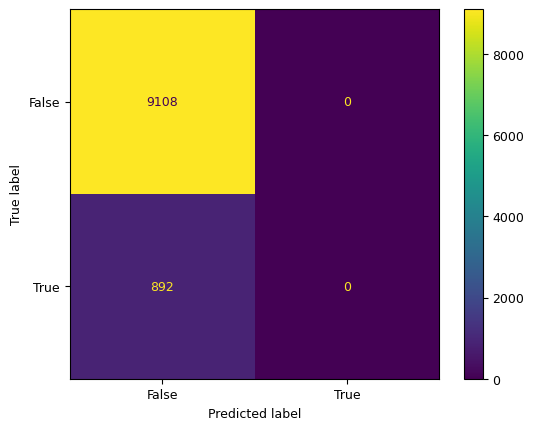

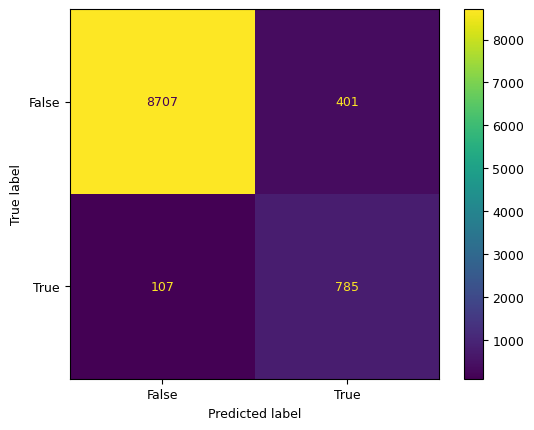

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_dummy) 
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_sdg)
plt.show()

### Qe Conclusion

In this exercise, we evaluated classification algorithms using custom Python metrics and scikit-learn's functions. We assessed precision, accuracy, recall, and the F1-score for an SGD classifier and a Dummy classifier. The SGD classifier outperformed the Dummy classifier in all metrics. However the dummy clasifier was significantly closer in accuracy. Therefore this exercise was meant to show us some important metrics to use when evaluating your algorithm. These metrics are of course use case specific. Fx it could be a good idea to have a high precision when judging criminals or have a high recall/sensitivity when scanning for diseases. Furthermore the F1-score is usefull if you don't care as much about the true negatives as it takes both into account. As is the case for the "is it a 5?"-algorithm and therefore the F1 provides us with a more accurate assesment of how useful the sdg algorithm and dummy-classifier are with thier ~75% and 0% respectively 

 Furthermore Confusion matrices and heatmaps provided detailed insights into their performance, and granted us a good visual component for the metrics. These will be important further in the course when we analyze more complex systems with more parameters. 